In [2]:
import ccxt
from datetime import datetime
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import statsmodels.api as sm
from functools import reduce
from statsmodels.tsa.api import *
import progressbar
import warnings

def crypto(trading_pair, figs = False):
    warnings.filterwarnings("ignore")
    df = pd.DataFrame()
    try:
        okex = ccxt.okex()
        poloniex = ccxt.poloniex()

        # collect the candlestick data from Binance
        binance = ccxt.binance()
        # candles = binance.fetch_ohlcv(trading_pair, '1d', okex.parse8601('2017-11-08T00:00:00'), poloniex.parse8601(datetime.now().strftime("%d/%m/%Y %H:%M:%S")))
        candles = binance.fetch_ohlcv(trading_pair, '1d')
        dates = []
        open_data = []
        high_data = []
        low_data = []
        close_data = []
        for candle in candles:
            dates.append(datetime.fromtimestamp(candle[0] / 1000.0).strftime('%Y-%m-%d %H:%M:%S.%f'))
            open_data.append(candle[1])
            high_data.append(candle[2])
            low_data.append(candle[3])
            close_data.append(candle[4])

        crypto = pd.DataFrame({'Open Price': open_data, 'High Price': high_data,'Low Price': low_data,'Close': close_data}, index = dates)
        df = crypto[['Close']]
        df = df.set_index(pd.to_datetime(df.index))
        df = df.resample('D').mean()

        if figs:
            decomposition = sm.tsa.seasonal_decompose(df, model = 'Addictive') #'multiplicative'
            fig, ax = plt.subplots(figsize = (12, 6))
            ax.grid(True)
            year = mdates.YearLocator(month=1)
            month = mdates.MonthLocator(interval=3)
            year_format = mdates.DateFormatter('%Y')
            month_format = mdates.DateFormatter('%m')
            ax.xaxis.set_minor_locator(month)
            ax.xaxis.grid(True, which = 'minor')
            ax.xaxis.set_major_locator(year)
            ax.xaxis.set_major_formatter(year_format)
            plt.plot(df.index, df['Close'], c='blue')
            plt.plot(decomposition.trend.index, decomposition.trend, c='red')
    except:
       # handle all other exceptions
       pass
    return df

In [3]:
crypto_list = pd.read_html('https://coinmarketcap.com/all/views/all/')[2].Symbol.loc[:50]

bar = progressbar.ProgressBar(maxval=len(crypto_list), widgets=[progressbar.Bar('>', '|', '| Obtaining Cryptos'), '...', progressbar.Percentage()])
bar.start()
bar_ = 0
for i in crypto_list:
    vars()[i] = crypto('{}/USDT'.format(i)).rename(columns={'Close':'{}'.format(i)})
    bar_ += 1
    bar.update(bar_)     
bar.finish()

dfs = []
for i in crypto_list:
    if len(vars()[i]) == 500:
        dfs.append(vars()[i])
df_final = reduce(lambda left, right: pd.merge(left, right, left_index = True, right_index = True), dfs)
df_final

|>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Obtaining Cryptos...100%


,BTC,ETH,BNB,DOGE,XRP,ADA,BCH,LTC,LINK,XLM,ETC,USDC,VET,TRX,EOS
2019-12-24,7255.77,127.75,13.3369,0.002018,0.19077,0.03388,188.30,40.34,1.8435,0.04501,3.9346,1.0010,0.005974,0.01354,2.5420
2019-12-25,7204.63,125.09,13.0666,0.002040,0.18852,0.03334,185.34,40.08,1.7826,0.04436,4.0403,1.0014,0.005848,0.01321,2.4801
2019-12-26,7202.00,125.58,13.1414,0.002024,0.18923,0.03416,187.79,40.01,1.8539,0.04468,4.4900,1.0017,0.005485,0.01335,2.5169
2019-12-27,7254.74,126.29,13.2888,0.002028,0.19003,0.03290,203.21,40.95,1.8751,0.04584,4.5117,1.0016,0.005665,0.01323,2.5712
2019-12-28,7316.14,128.11,13.6779,0.002046,0.19320,0.03365,206.27,42.83,1.8746,0.04589,4.4137,1.0019,0.005666,0.01348,2.6283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-02,56578.21,2949.56,621.7800,0.373970,1.56050,1.32670,972.25,268.88,39.4610,0.55601,44.9200,0.9993,0.214880,0.12759,6.5255
2021-05-03,57169.39,3431.04,676.1500,0.441420,1.55460,1.36220,1015.02,294.87,42.0520,0.55044,52.0370,0.9992,0.210840,0.13159,6.8056
2021-05-04,53200.01,3239.01,609.3000,0.538540,1.38770,1.26980,950.89,305.23,45.5270,0.50152,69.2490,0.9995,0.187530,0.11917,6.3400
2021-05-05,57436.11,3524.26,651.1000,0.654000,1.61330,1.47980,1453.49,356.04,49.5750,0.60473,93.9620,0.9988,0.207050,0.14654,8.7205


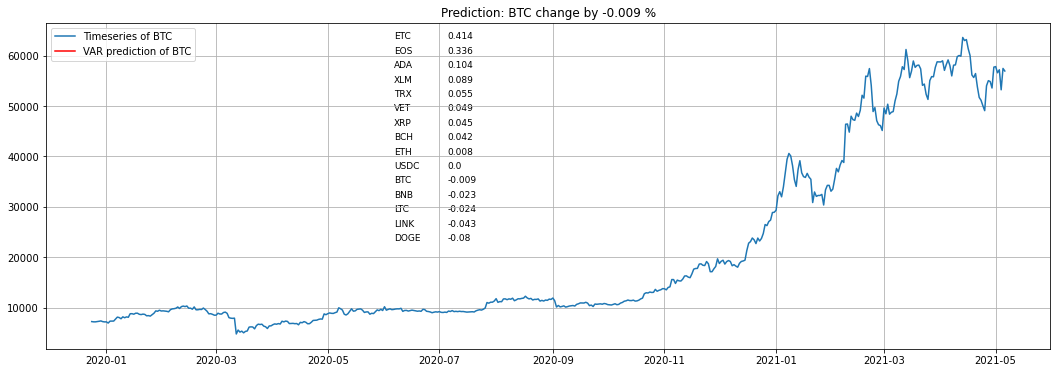

In [16]:
# SHORT VERSION
warnings.filterwarnings("ignore")

coin_req = 'BTC'
days_of_forecast = 1
data = df_final

model = VAR(data)
model_fit = model.fit()
pred = model_fit.forecast(model_fit.y, steps=days_of_forecast)

pred = pd.DataFrame(pred, columns = df_final.columns, index = (pd.Series(pd.date_range('today', periods=days_of_forecast, freq='D').normalize(), name='Date')).values)
pred.iloc[0] = df_final.iloc[-1]

merged = df_final.append(pred).resample('D').mean()
changes = pd.DataFrame(merged.pct_change(periods = days_of_forecast).iloc[-1].sort_values(ascending=False))
changes.columns = ['Change']

plt.figure(figsize = (18, 6))
plt.plot(df_final[coin_req], label = 'Timeseries of {}'.format(coin_req))
plt.plot(pred[coin_req], 'r', label = 'VAR prediction of {}'.format(coin_req))
plt.grid()
plt.legend()
plt.title('Prediction: {} change by {} %'.format(coin_req, round(float(changes.loc[coin_req].values), 3)))
table = plt.table(cellText=np.round(changes.values, 3), colWidths = [0.5] * len(changes.columns),
      rowLabels = changes.index, cellLoc = 'left', rowLoc = 'left', loc = 8, edges='open') # Adjust table size loc and allignment
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(.5, 1.2);

In [17]:
changes.to_excel(r'Changes{}'.format(pred.index[1]))

IndexError: index 1 is out of bounds for axis 0 with size 1